In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Downloads\\Kmean_dataset.csv")
# print(data)
# print(data.columns)
data = data.to_numpy()    #converting the dataset to numpy

<h3>Feature Scaling</h3>
<h4>Mean Normalization</h5>

In [3]:
def mean_norm(X):
    mean_values = np.mean(X, axis=0)
    denominator_range = np.ptp(X, axis=0)
    output = (X - mean_values)/denominator_range
    return output

In [4]:
X = mean_norm(data)

In [5]:
X

array([[ 0.32352158, -0.12378425,  0.03394821, ...,  0.06711428,
         0.47923612,  0.22689497],
       [ 0.05246895, -0.10995026, -0.12113201, ...,  0.07524436,
         0.28875993,  0.21619596],
       [ 0.04194264,  0.00467425,  0.16229045, ...,  0.0589842 ,
         0.20451084,  0.31248698],
       ...,
       [ 0.07089001,  0.38412089, -0.05696088, ..., -0.29873938,
        -0.38523274,  0.06284361],
       [ 0.04457422,  0.05012879,  0.00186264, ..., -0.2906093 ,
        -0.36325472,  0.06640994],
       [ 0.2972058 ,  0.34854776,  0.19972361, ..., -0.28247922,
        -0.37058073, -0.13330475]])

In [6]:
X.shape

(178, 13)

<h3>Defining necessary Functions</h3>

In [7]:
''' Initializing k centroids from training dataset'''
def k_centroids(X,k):
    m,n = X.shape
    init_centroids = X[np.random.choice(m , k , replace = False)]
    return init_centroids

In [8]:
'''Clustering the training datapoints to centroids'''
def label_datapoints( X , centroids):
    m,n = X.shape
    k = centroids.shape[0]
    idx=np.zeros(m)
    for i in range(m):
        diff = (centroids - X[i])**2
        dist = np.sum(diff , axis = 1)
        idx[i] = np.argmin(dist)
    return idx       

In [9]:
'''calculate new centroids'''
def compute_centroids(X , centroids, idx):
    k= centroids.shape[0]
    m,n = X.shape
    new_centroids = np.zeros((k,n))
    for i in range(k):
        points = X[ idx == i]
        new_centroids[i] = np.mean(points , axis = 0)
    return new_centroids

In [10]:
def compute_wcss(X,centroids,idx):
    m,n = X.shape
    k=centroids.shape[0]
    wcss=0
    for i in range(k):
        points = X[idx == i]
        distortion = np.sum((points - centroids[i])**2)
        wcss= wcss + distortion
    return wcss

In [11]:
def RunK_means(X, k , num_iters, tol):
    m, n = X.shape
    centroids = k_centroids(X,k)
    idx = np.zeros(m)
    for i in range(num_iters):
        idx = label_datapoints(X, centroids)
        new_centroids = compute_centroids(X, centroids, idx)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids    
    wcss = compute_wcss(X, centroids, idx)
    return idx, wcss 

In [12]:
def elbow_method(X, K, num_iters,tol):
    m,n = X.shape
    wcss = np.zeros(K)
    for k in range(K):
        idx,wcss[k] = RunK_means(X,k+1 , num_iters,tol)
    x= np.arange(1,K+1)
    plt.plot(x , wcss, marker='o')
    plt.title('Elbow Graph to determine optimal number of clusters')
    plt.xlabel('No. of clusters')
    plt.ylabel('wcss')
    plt.show()
    print(wcss)

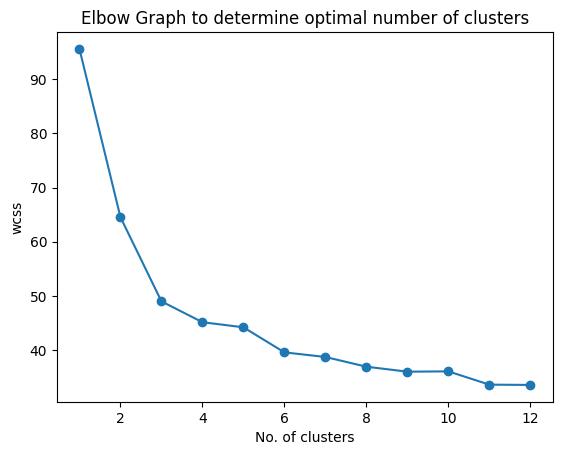

[95.59953778 64.53766702 48.98884443 45.13845603 44.19938061 39.56895258
 38.71654797 36.92215855 36.00352261 36.0616277  33.60857583 33.55840877]


In [13]:
elbow_method(X,12, 100,tol = 1e-4)

In [16]:
labels , wcss = RunK_means(X,6,100 , 1e-4)

In [17]:
labels

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 3., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 1., 5., 5., 5., 5., 3., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 1., 2., 2., 1., 3., 2., 1., 3., 0.,
       2., 1., 2., 3., 0., 5., 3., 1., 1., 2., 1., 3., 0., 3., 0., 2., 3.,
       1., 0., 0., 0., 0., 2., 2., 2., 3., 3., 1., 1., 1., 3., 3., 1., 1.,
       0., 0., 0., 2., 0., 2., 0., 3., 3., 0., 2., 0., 0., 0., 0., 0., 2.,
       0., 3., 3., 0., 3., 3., 0., 3., 2., 0., 0., 1., 4., 4., 4., 2., 4.,
       4., 4., 4., 2., 2., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 2., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4.])